# Chapter 14 기계학습으로 똑똑한 컴퓨터를 만들자

## 도전문제 14.1

#### 키와 성 이외에도 몸무게에 영향을 줄 수 있는 요소로는 나이와 신체활동 시간등의 요소가 있을 것이다. 자신의 주위에 있는 10명 이상의 지인을 대상으로 데이터를 수집하고 가설을 세운 후 션형회귀 모델을 구현하여 자신의 가설을 검증해 보도록 하자.

In [1]:
import numpy as np
from sklearn import linear_model

regr = linear_model.LinearRegression()

X = [[164, 1, 16, 12], [167, 1, 17, 10], [165, 0, 18, 6], [170, 0, 20, 6], [179, 0, 23, 8],
     [163, 1, 19, 6], [159, 0, 20, 7], [166, 1, 20, 14], [167, 1, 26, 16], [165, 0, 26, 13]]
y = [43, 48, 47, 66, 67, 50, 52, 44, 60, 58]
regr.fit(X, y)
print('계수 :', regr.coef_)
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('은지와 동민이의 추정 몸무게 :', regr.predict([[166, 1, 20, 8], [166, 0, 19, 15]]))

계수 : [ 0.71127226 -0.29266769  1.86861332 -1.04973038]
절편 : -92.79971266363029
점수 : 0.8410704019573532
은지와 동민이의 추정 몸무게 : [53.95323805 45.02917976]


## 도전문제 14.2

#### `y_pred`와 `y_test` 사이의 오차를 구하는 여러가지 방법이 있으나 우리는 각각의 예측과 목표값의 차이를 제곱하여 더한 뒤에 전체 데이터의 개수 `n`으로 나누는 방법을 사용하려 한다. 이렇게 구한 오차를 평균 제곱 오차(Mean Square Error)라고 한다. 넘파이를 이용하여 다음과 같은 평균제곱오차를 구하여라.(아래의 식에서 $N$은 원소의 개수, $y_i$는 $i$번째 `y_test`값이며, $H(X_i)$는 선형회귀 모델이 추정한 `y_pred`에 해당한다.
#### <center> $MSE = \frac{1}{N}\displaystyle\sum_{i=1}^{N} (H(X_i) - y_i)^2$ </center>

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets

diabetes = datasets.load_diabetes()

regr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.2)

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('평균제곱 오차(MSE):', mean_squared_error(y_test, y_pred))

평균제곱 오차(MSE): 3411.179804138872


## 도전문제 14.3

#### 위의 코드를 수정하여 `n_neighbors`가 1, 3, 5, 10, 20, 30일 때의 정확도를 각각 다음과 같이 출력하여라.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

for i in [1, 3, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(i, scores))

n_neighbors가 1일때 정확도: 0.967
n_neighbors가 3일때 정확도: 0.967
n_neighbors가 5일때 정확도: 0.967
n_neighbors가 10일때 정확도: 0.933
n_neighbors가 20일때 정확도: 0.967
n_neighbors가 30일때 정확도: 0.933


## LAB 14-1 키가 비슷해도 남, 녀의 몸무게는 다를 것 : 다차원 선형회귀

#### 일반적으로 여자의 몸무게는 남자의 몸무게보다 가볍다. 이러한 점을 보완하여 이 모델의 특징 feature에 키와 성(남, 녀)을 추가하면 이 모델은 더욱더 성공적일 것이다. 이제 철수의 반에 있는 8명의 학생들에 대하여 키, 몸무게를 성별까지 함께 표기해보자. 이 데이터에 남자는 0, 여자는 1과 같은 값을 부여하였다. 이들의 키와 몸무게는 다음과 같은 데이터로 주어진다.
#### (1) 이제 이 데이터를 바탕으로 선형회귀 모델을 생성하여라. 이 선형회귀 모델의 `coef_`와 `intercept_` 값은 각각 얼마인가? 또한 이 모델의 `score`값은 얼마인가?
#### (2) 다음으로 키가 166cm인 여학생(1) 은지와 같은 키의 남학생(0) 동민이의 몸무게를 선형회귀를 사용하여 추정하여라.

In [4]:
import numpy as np
from sklearn import linear_model

regr = linear_model.LinearRegression()

X = [[164, 1], [167, 1], [165, 0], [170, 0], [179, 0], [163, 1], [159, 0], [166, 1]]
y = [43, 48, 47, 66, 67, 50, 52, 44]
regr.fit(X, y)
print('계수 :', regr.coef_)
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('은지와 동민이의 추정 몸무게 :', regr.predict([[166, 1], [166, 0]]))

계수 : [ 0.88542825 -8.87235818]
절편 : -90.97330367074525
점수 : 0.7404546306026772
은지와 동민이의 추정 몸무게 : [47.13542825 56.00778643]


## LAB 14-2 데이터 80%로 학습하여 예측한 결과와 실제 데이터 비교

#### 사이킷런 모듈에서 제공하는 데이터의 80%를 학습용으로 사용하고, 이를 이용하여 테스트용 입력 20%에 대해 당뇨수치를 예측할 수 있다. 이렇게 예측한 결과와 실제 당뇨 수치를 시각적으로 비교하여 보자. <br> 2차원 공간에 한 축은 예측한 당뇨 수치, 다른 한 축은 실제 당뇨 수치로 하여 (예측값, 실제값)의 점을 아래와 같이 산포도 그래프로 그리면 될 것이다.

[ -11.45052246 -238.17652931  518.01009146  315.26403122 -883.25961702
  506.84943999  155.19979432  223.32427105  817.70947861   16.11569719] 152.84695747809047


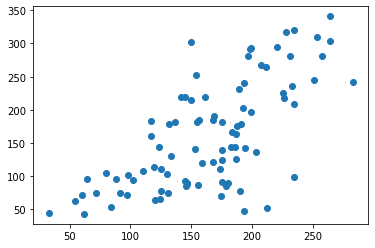

In [5]:
import numpy as np
from sklearn import linear_model
from sklearn import datasets
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes()
regr = linear_model.LinearRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.2)

regr.fit(X_train, y_train)
print(regr.coef_, regr.intercept_)

y_pred = regr.predict(X_test)

plt.scatter(y_pred, y_test)
plt.show()